# 프로젝트 1 : 선형회귀, 당뇨병 수치를 맞추자!

In [1]:
import sklearn
from sklearn.datasets import load_diabetes 

### (1) 데이터 가져오기

In [2]:
import pandas as pd
diabets = load_diabetes()
diabets.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

### (2)  모델에 입력할 데이터 X, y 준비하기

In [3]:
import numpy as np
df_X = np.array(diabets.data)
df_y = np.array(diabets.target)

print(df_X.shape,df_y.shape)

n_feature= df_X.shape[1]

(442, 10) (442,)


### (3) train 데이터와 test 데이터로 분리하기

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size= 0.2, random_state =10)

print(len(y_train),len(y_test))

353 89


### (4) 모델 준비하기

In [5]:
def LinearFunction(X, W, b):
    y= np.dot(X,W)+b
    return y
W = np.random.rand(n_feature)
b = np.random.rand(1)

print(W, b)
type(W)

y_pred = LinearFunction(X_train, W, b)
y_pred[:5]

[0.80623785 0.58678615 0.54633119 0.15286812 0.41816913 0.57804071
 0.32161084 0.85927126 0.45433676 0.31470978] [0.42833382]


array([0.48966321, 0.44332044, 0.50084609, 0.52637415, 0.60360017])

### (5) 손실함수 Loss 정의하기

In [6]:
def LossFunction(y_true, y_pred):
    mse = ((y_true-y_pred)**2.).mean()
    return mse

### (6) 기울기를 구하는 gradient 함수 구현하기

In [7]:
def Gradient(X, y_true, y_pred):

    N = len(y_true)
    dW = 1/N * 2 * X.T.dot(y_pred - y_true)
    db = 2 * (y_pred - y_true).mean()
    return dW, db

### (7) 하이퍼 파라미터인 학습률 설정하기

In [8]:
Learning_rate = 0.1

### (8) 모델 학습하기

In [9]:
losses =[]

for i in range(1000):
    y_pred = LinearFunction(X_train, W, b)
    dW, db = Gradient(X_train, y_train, y_pred)
    L = LossFunction(y_train, y_pred)
    W = W - Learning_rate*dW
    b = b - Learning_rate*db
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  # 'Iteration %d : Loss %0.4f' % (i, L)
# 최종 가중치 및 bias 결과 
print(W,b)

Iteration 0 : Loss 29087.4951
Iteration 100 : Loss 5164.5713
Iteration 200 : Loss 4680.9652
Iteration 300 : Loss 4326.9931
Iteration 400 : Loss 4064.5908
Iteration 500 : Loss 3867.1980
Iteration 600 : Loss 3716.2505
Iteration 700 : Loss 3598.7453
Iteration 800 : Loss 3505.5498
Iteration 900 : Loss 3430.2270
[  59.99918359  -26.84289245  248.72119015  177.50004722   38.47337514
   14.64462052 -153.77109812  142.19525008  224.78093385  120.78817446] [152.03588783]


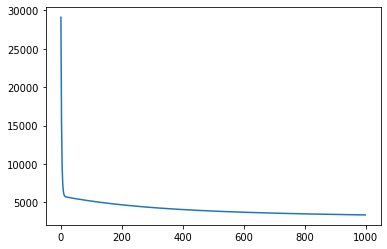

In [10]:
import matplotlib.pyplot as plt

plt.plot(losses)


### (9) test 데이터에 대한 성능 확인하기


In [11]:
yt_pred = LinearFunction(X_test, W, b)
L = LossFunction(y_test, yt_pred)
L

3707.4179843426514

### (10) 정답 데이터와 예측한 데이터 시각화하기

(0.0, 400.0)

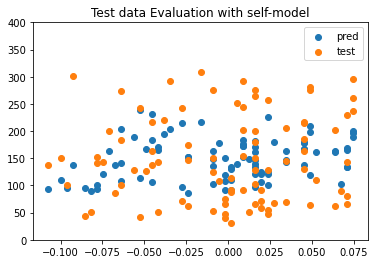

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:,0], yt_pred, label='pred')
plt.scatter(X_test[:,0], y_test, label='test')
plt.title('Test data Evaluation with self-model')
plt.legend()
plt.ylim(0, 400)

### (11) sklearn 라이브러리 함수 (LinearRegression) 활용하여 평가하기

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions[:5]

array([148.0978202 , 208.21400551, 186.40125844,  82.48876916,
       163.39689627])

In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2911.827951689161

(0.0, 400.0)

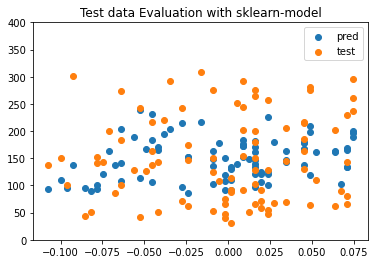

In [16]:
plt.scatter(X_test[:,0], yt_pred, label='pred')
plt.scatter(X_test[:,0], y_test, label='test')
plt.title('Test data Evaluation with sklearn-model')
plt.legend()
plt.ylim(0, 400)

### 회고
. 선형함수, Loss 함수, 및 기울기 평가 등을 직접 구현하여 전체적 과정을 직접 수행해 봄  
. sklearn LinearRegression 모델을 적용하여 간단하게 평가하는 방법도 적용함  
. 두 방법의 Test Data에 대한 Loss 값: 직접구현 = 3707, LinearRegression=2911 -> sklearn 모델의 성능이 약간 더 우수함  
. LinearRegression의 경우 W, b, learning_rate, max_iter 등의 정보를 확인할 수 없는 것이 단점임  

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [25]:
import pandas as pd

bike = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(bike.shape)
bike

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [27]:
bike_time= pd.to_datetime(bike.datetime)
bike_time.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [30]:
bike_time.shape

(10886,)